## Bike Rental Problem to solve:
You are provided hourly rental data spanning two years. For this excercise, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month.

You must predict the total count of bikes rented during each hour, using only information available prior to the rental period.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
df_bike = pd.read_csv("Bike-train.csv")
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Description
datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

In [6]:
df_bike.shape

(10886, 12)

In [7]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [9]:
df_bike.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [10]:
df_bike.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

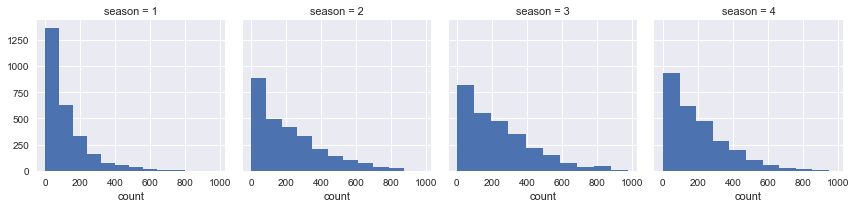

In [11]:
g = sns.FacetGrid(df_bike,col='season')
g.map(plt.hist,'count')

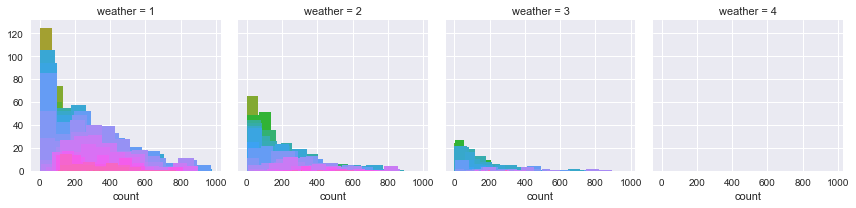

In [77]:
g = sns.FacetGrid(df_bike,col='weather',hue='temp')
g.map(plt.hist,'count')

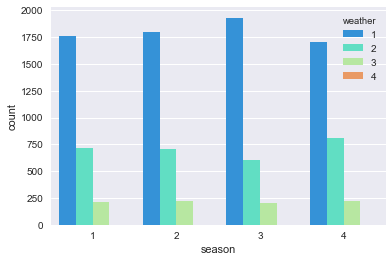

In [13]:
sns.countplot(x='season', data =df_bike,hue='weather',palette='rainbow')

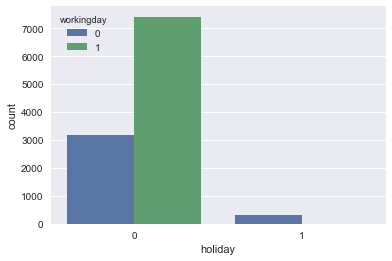

In [14]:
sns.countplot(x='holiday',data=df_bike,hue='workingday')

### Feature Engineering
Extract the hour from datetime column

In [15]:
import datetime as dt

In [21]:
df_bike['datetime'] = pd.to_datetime(df_bike['datetime'])
df_bike['hour'] = df_bike['datetime'].dt.hour

In [22]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
hour          10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(9)
memory usage: 1.1 MB


In [25]:
df_bike.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


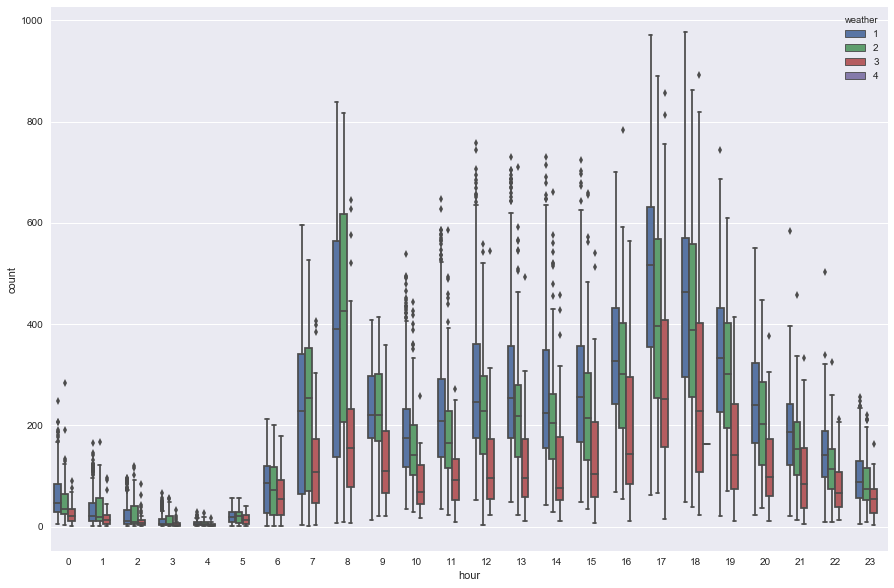

In [84]:
plt.figure(figsize=(15,10))
sns.boxplot(x='hour',y='count',data=df_bike,hue='weather')

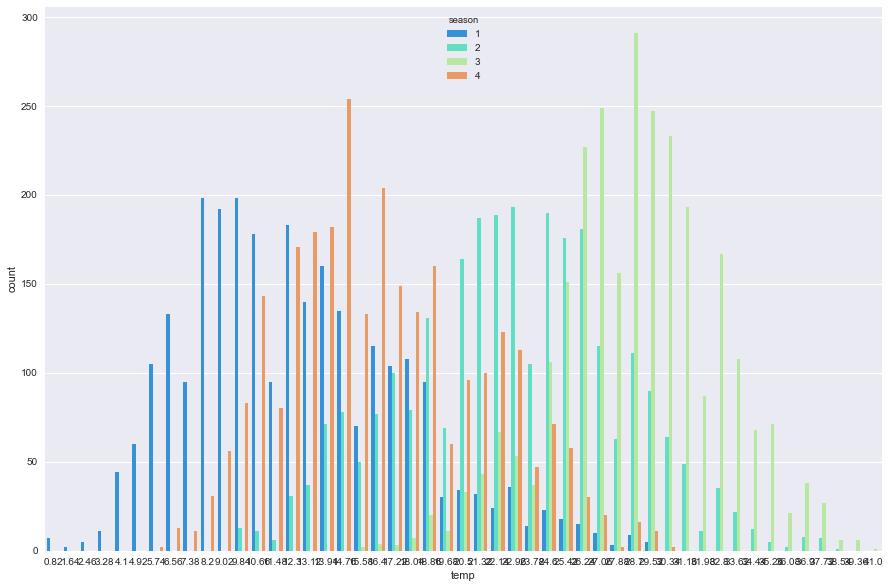

In [85]:
plt.figure(figsize=(15,10))
#sns.boxplot(x='hour',y='count',data=df_bike,hue='weather')
sns.countplot(x='temp',data=df_bike,hue='season',palette='rainbow')

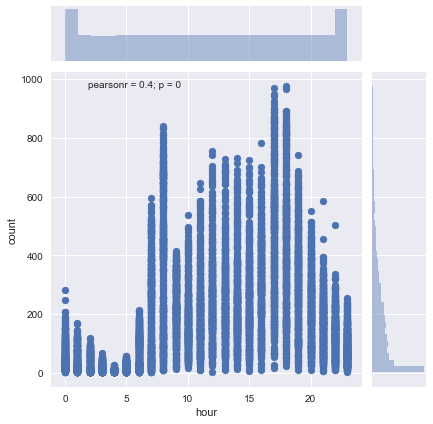

In [39]:
sns.jointplot(x='hour',y='count',data=df_bike,kind='scatter')

## Create a Model

In [ ]:
#Split X and y

In [40]:
df_bike.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour'],
      dtype='object')

In [43]:
X = df_bike[[ 'season', 'holiday', 'workingday', 'weather', 'temp','humidity', 'windspeed', 'hour']]
y = df_bike['count']

In [45]:
# Split the dataset into train set and test set

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [54]:
from sklearn.linear_model import LinearRegression

In [56]:
lmodel = LinearRegression()
lmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
pred = lmodel.predict(X_test)

In [61]:
print('Coefficients: \n', lmodel.coef_)

Coefficients: 
 [ 22.9835652   -9.37034936  -0.83791938  -1.16189048   7.02424925
  -2.30040914   0.05680177   7.71819541]


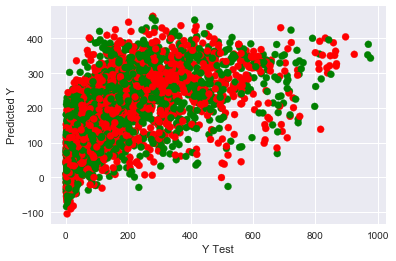

In [88]:
plt.scatter(y_test,pred,c=('r','g'))
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluate the model

In [111]:
from sklearn import metrics

In [70]:
print('MAE :', metrics.mean_absolute_error(y_test,pred))
print('MSE :', metrics.mean_squared_error(y_test,pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE : 108.785423522
MSE : 21623.5813523
RMSE : 147.049588072


In [117]:
print('R2 square :', metrics.r2_score(y_test,pred))

R2 square : 0.323260944053


#### Print the Coefficients

In [76]:
coefficients = pd.DataFrame(lmodel.coef_,X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
season,22.983565
holiday,-9.370349
workingday,-0.837919
weather,-1.161890
temp,7.024249
humidity,-2.300409
windspeed,0.056802
hour,7.718195


## L2 Regularization 
L2 Regularization adds a penalty equal to the sum of squared value of the coefficients

In [89]:
from sklearn.linear_model import Ridge

In [118]:
ridge = Ridge(alpha=0.5)

In [119]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [120]:
rid_pred = ridge.predict(X_test)

In [138]:
print('Coefficient \n',lmodel.coef_,'\n')
print('Coefficient after ridge \n',ridge.coef_)

Coefficient 
 [ 22.9835652   -9.37034936  -0.83791938  -1.16189048   7.02424925
  -2.30040914   0.05680177   7.71819541] 

Coefficient after ridge 
 [ 22.98208412  -9.34626196  -0.83552464  -1.16177078   7.02429549
  -2.30039578   0.0567775    7.71818779]


## Create a DecisionTree Regressor

In [98]:
from sklearn.tree import DecisionTreeRegressor

In [128]:
dtree = DecisionTreeRegressor()

In [129]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [130]:
tree_pred = dtree.predict(X_test)

In [131]:
metrics.r2_score(y_test,tree_pred)

0.71744907502414956